<a href="https://colab.research.google.com/github/suparna-kouri/portfolio-template/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock Market Prediction and Forecasting using Stacked LSTM**

**Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

**Loading the dataset**

In [ ]:
data = pd.read_csv('/content/stock.csv')
data = data.iloc[::-1]

**Displaying the first five rows of the dataset**

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


**Displaying the last five rows**

In [ ]:
data.tail()
     

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


**Displaying information about the dataset**

In [ ]:
data.shape

(2035, 8)

In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

**Data Cleaning and Preprocessing**

**Checking for the null values**

In [ ]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

**Checking for the duplicate values**

In [ ]:
duplicates = data.duplicated()
duplicates.value_counts()
     

False    2035
dtype: int64

**Statistical Description of the Dataset**

In [ ]:

data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


<ipython-input-21-7d3faf4191b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

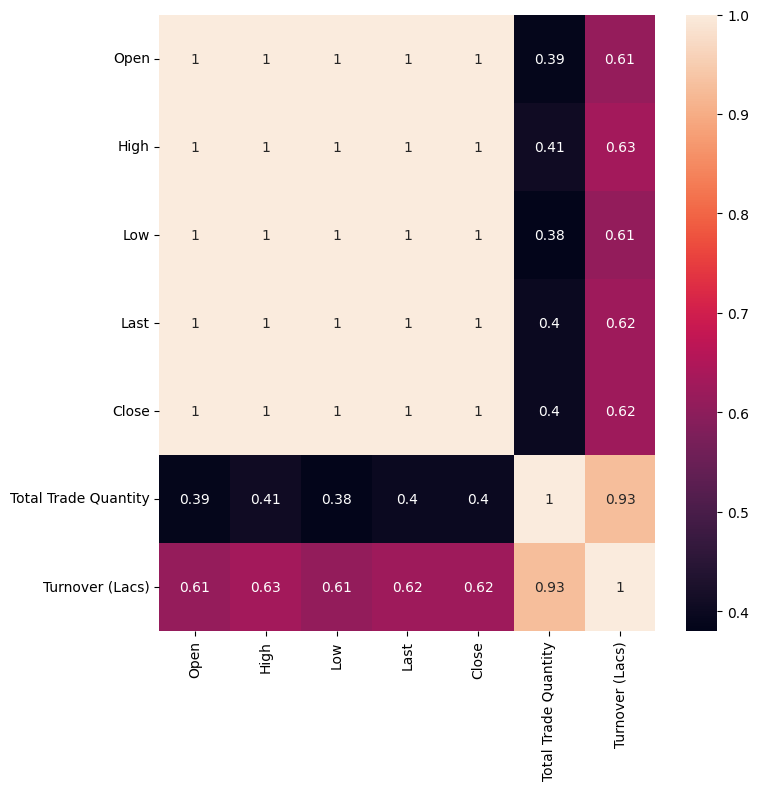

In [ ]:

plt.figure(figsize = (8,8))
sns.heatmap(data.corr(), annot = True)

<ipython-input-22-7caaaa9fbdab>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.cov(), annot = True, fmt = 'g')


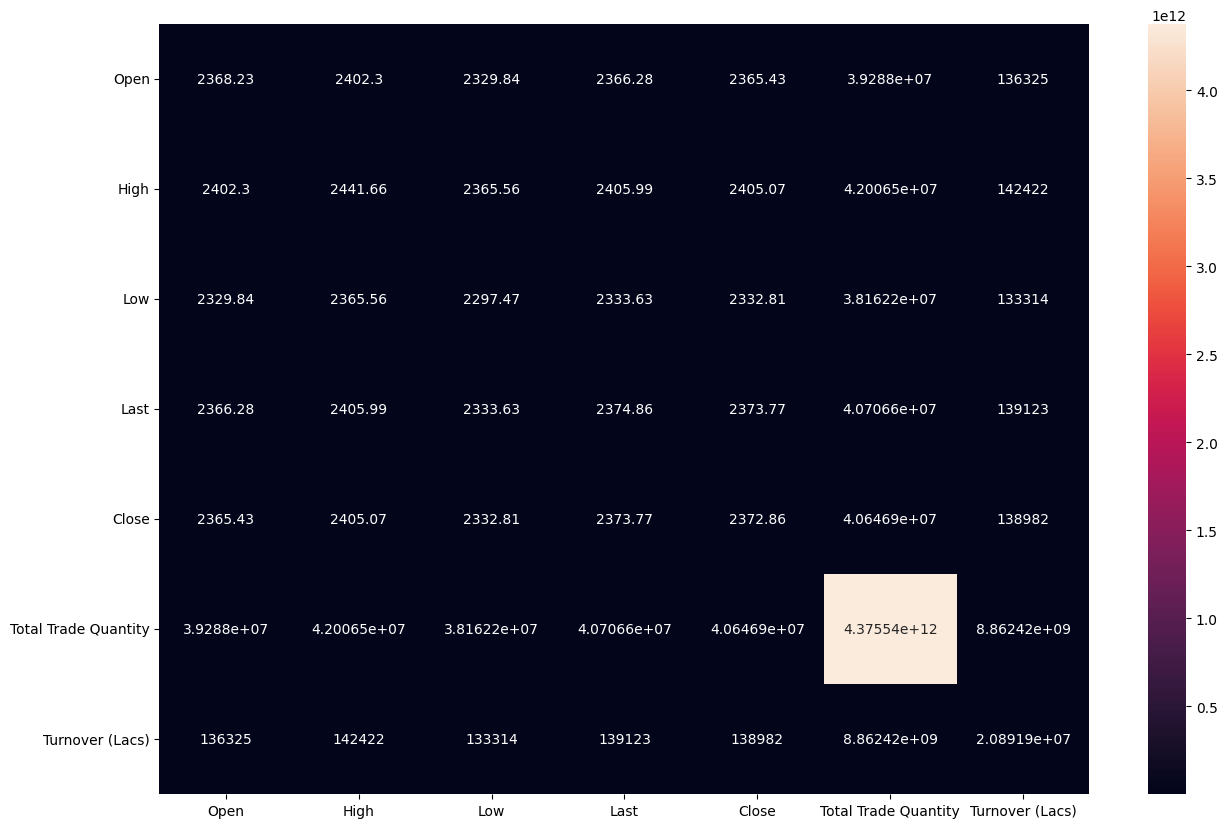

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(data.cov(), annot = True, fmt = 'g')
plt.show()

**Data Visualisation**

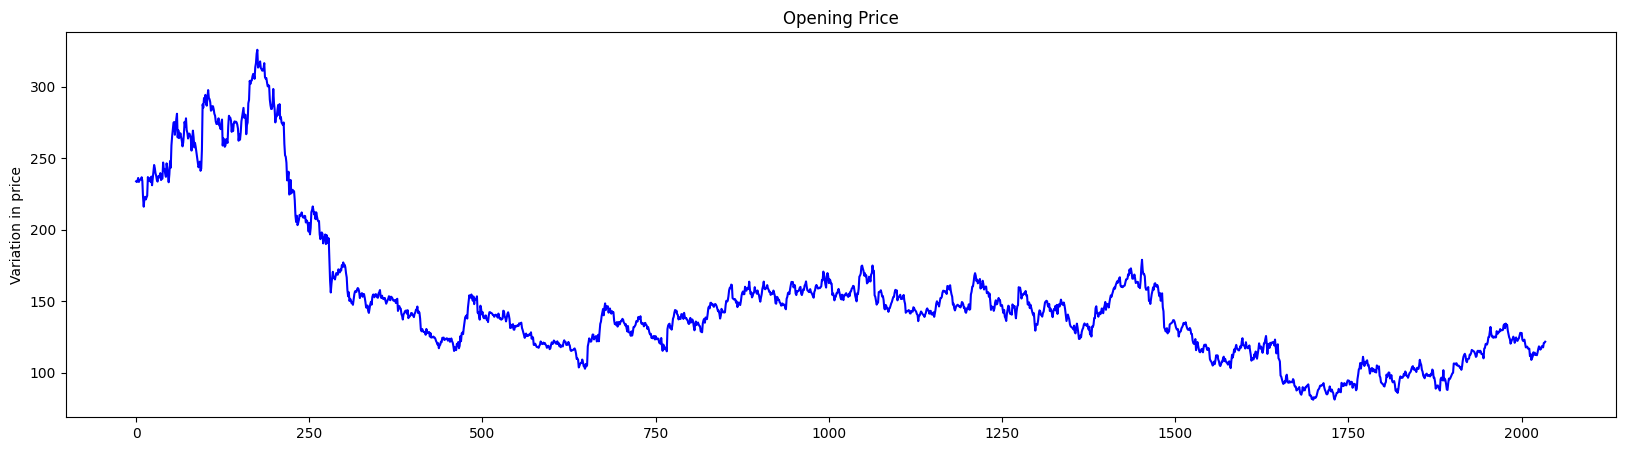

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(data.Close, color = 'b')
plt.ylabel('Variation in price')
plt.title("Opening Price")
plt.show()

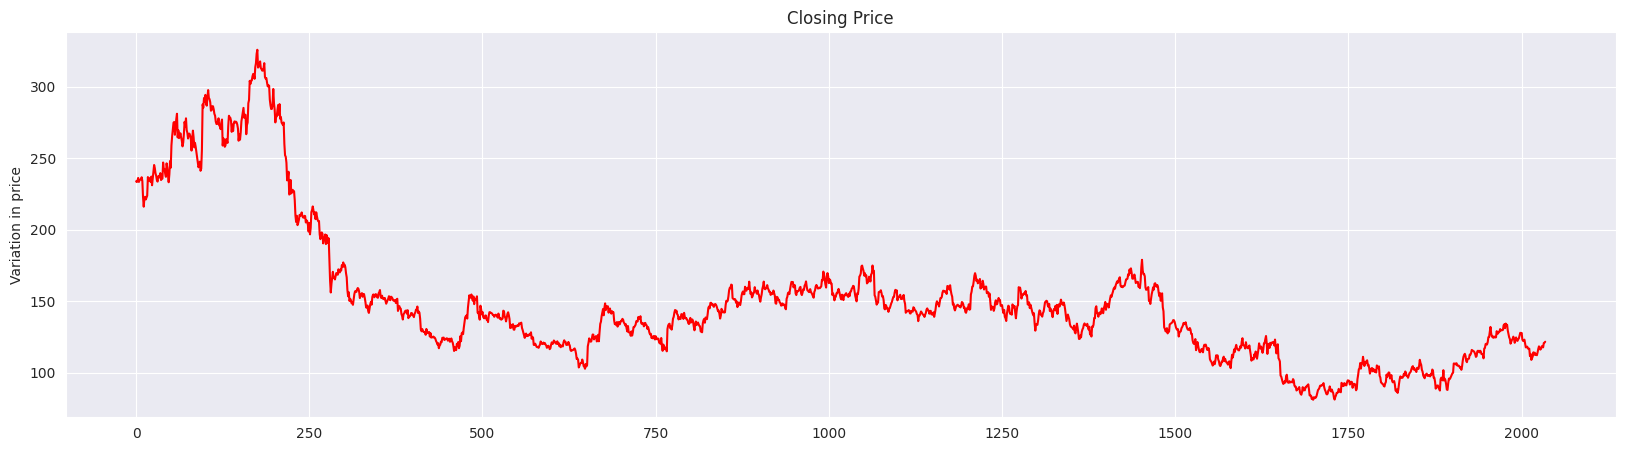

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.Close, color = 'r')
plt.ylabel('Variation in price')
plt.title("Closing Price")
plt.show()

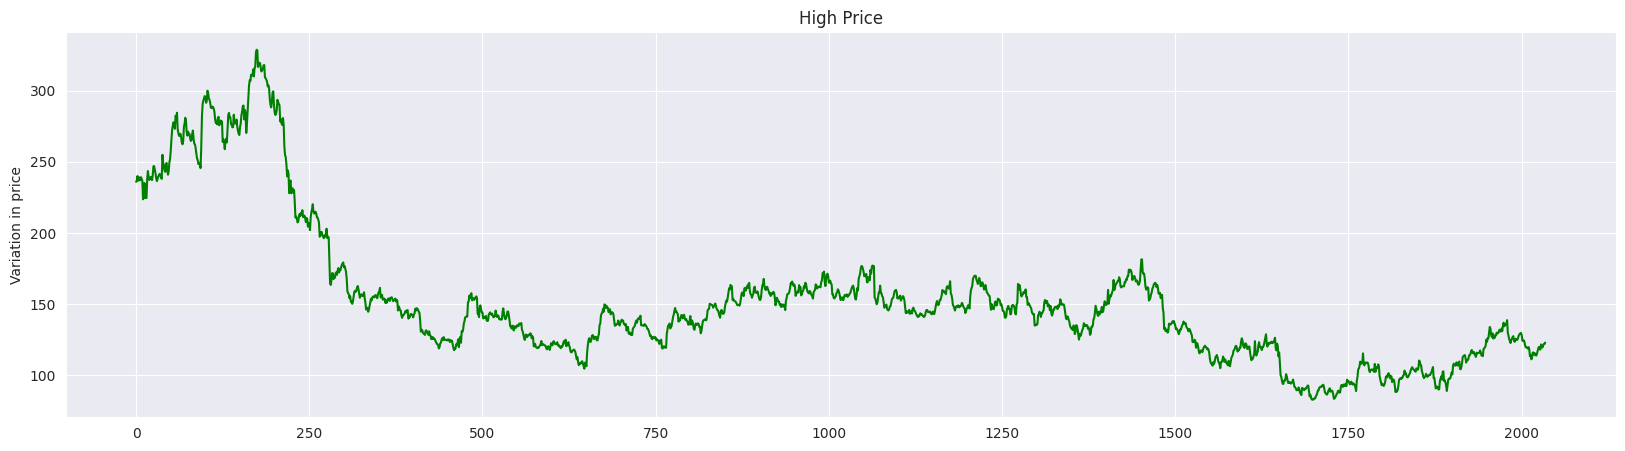

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.High, color = 'g')
plt.ylabel('Variation in price')
plt.title("High Price")
plt.show()

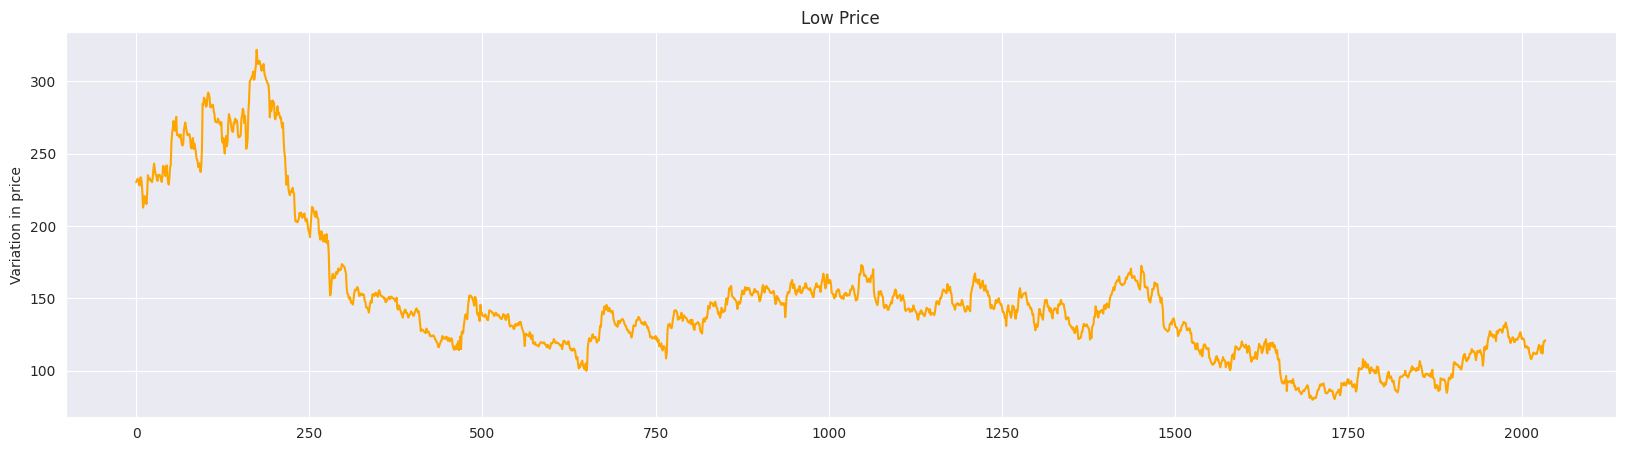

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.Low, color = 'Orange')
plt.ylabel('Variation in price')
plt.title("Low Price")
plt.show()

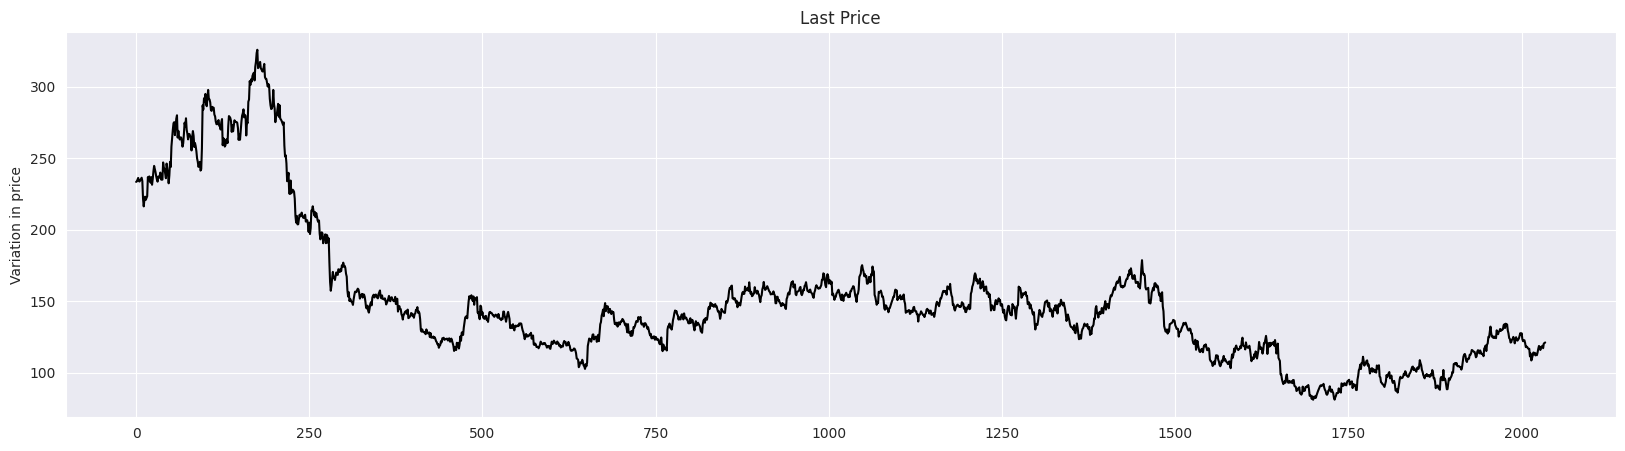

In [ ]:

sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.Last, color = 'Black')
plt.ylabel('Variation in price')
plt.title("Last Price")
plt.show()

**Building the model**

In [ ]:

data.Date = pd.to_datetime(data.Date,format="%Y-%m-%d")
data.index = data['Date']
data.drop('Date', axis = 1,inplace = True)
data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60


In [ ]:
data_high=data.reset_index()['High']

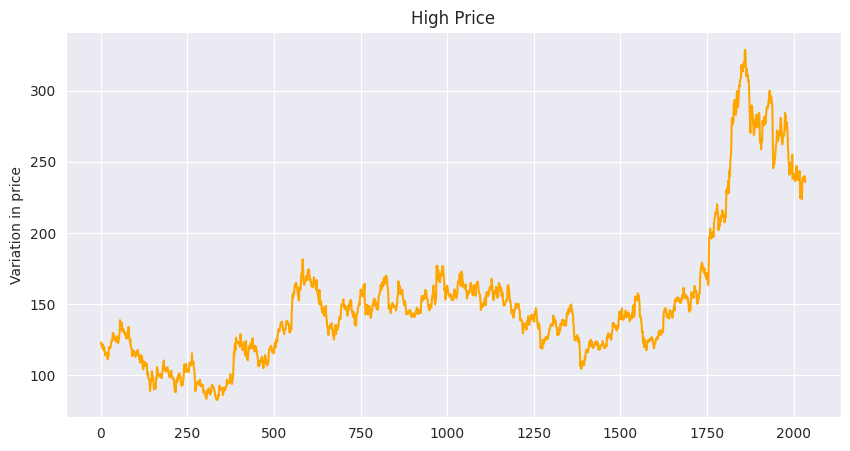

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
plt.plot(data_high, color = 'Orange')
plt.ylabel('Variation in price')
plt.title("High Price")
plt.show()


**Feature Scaling**

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
data_high = scaler.fit_transform(np.array(data_high).reshape(-1,1))

In [ ]:
data_high.shape

(2035, 1)

In [ ]:
data_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

**Splitting the data into train and test sets**

In [ ]:
training_size = int(len(data_high) * 0.75)
test_size = len(data_high) - training_size
train_data, test_data = data_high[0:training_size,:], data_high[training_size:len(data_high),:1]

In [ ]:
training_size,test_size

(1526, 509)

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

**Reshaping the input to (samples, time steps, features)**

In [ ]:

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
print("The shape of X_train is : ", X_train.shape), print("The shape of Y_train is : ", Y_train.shape)

The shape of X_train is :  (1425, 100, 1)
The shape of Y_train is :  (1425,)


(None, None)

In [ ]:
print("The shape of X_test is : ", X_test.shape), print("The shape of Y_test is : ", Y_test.shape)

The shape of X_test is :  (408, 100, 1)
The shape of Y_test is :  (408,)


(None, None)

**Creating the LSTM Model**

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)
     

Epoch 1/100
23/23 [==============================] - 26s 635ms/step - loss: 0.0106 - val_loss: 0.0329
Epoch 2/100
23/23 [==============================] - 15s 624ms/step - loss: 0.0017 - val_loss: 0.0083
Epoch 3/100
23/23 [==============================] - 15s 641ms/step - loss: 9.1340e-04 - val_loss: 0.0069
Epoch 4/100
23/23 [==============================] - 13s 551ms/step - loss: 8.5717e-04 - val_loss: 0.0053
Epoch 5/100
23/23 [==============================] - 15s 640ms/step - loss: 7.8399e-04 - val_loss: 0.0061
Epoch 6/100
23/23 [==============================] - 13s 573ms/step - loss: 7.5216e-04 - val_loss: 0.0046
Epoch 7/100
23/23 [==============================] - 14s 614ms/step - loss: 7.5184e-04 - val_loss: 0.0074
Epoch 8/100
23/23 [==============================] - 17s 728ms/step - loss: 7.2043e-04 - val_loss: 0.0036
Epoch 9/100
23/23 [==============================] - 23s 985ms/step - loss: 7.1098e-04 - val_loss: 0.0049
Epoch 10/100
23/23 [==============================] - 

**Making predictions**

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

**Model Evaluation**

In [ ]:
math.sqrt(mean_squared_error(Y_train, train_predict))

135.33461970762605

**Plotting the results**

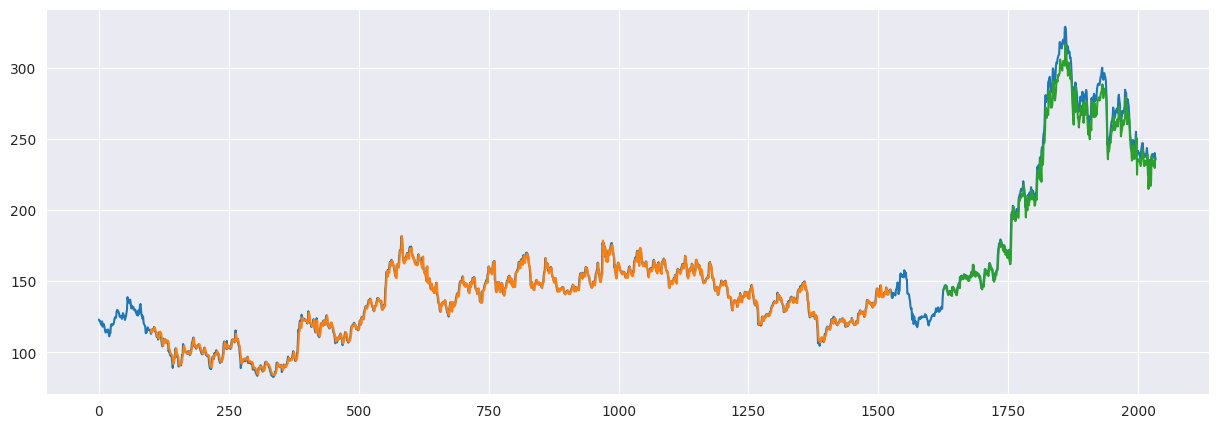

In [ ]:
look_back = 100
trainPredictPlot = np.empty_like(data_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(data_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(data_high) - 1, :] = test_predict

#Plot baseline and predictions
plt.figure(figsize=(15,5))
plt.plot(scaler.inverse_transform(data_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**Making predictions for next 30 days**

In [ ]:
len(test_data), X_test.shape

(509, (408, 100, 1))

In [ ]:
X_input = test_data[409:].reshape(1,-1)
X_input.shape

(1, 100)

In [ ]:

temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [ ]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input = X_input.reshape((1, n_steps, 1))
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps,1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5989091]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 0

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:

day_new.shape

(100,)

In [ ]:
day_pred.shape

(30,)

In [ ]:
data_new = data_high.tolist()
data_new.extend(lst_output)

In [ ]:
len(data_high)

2035

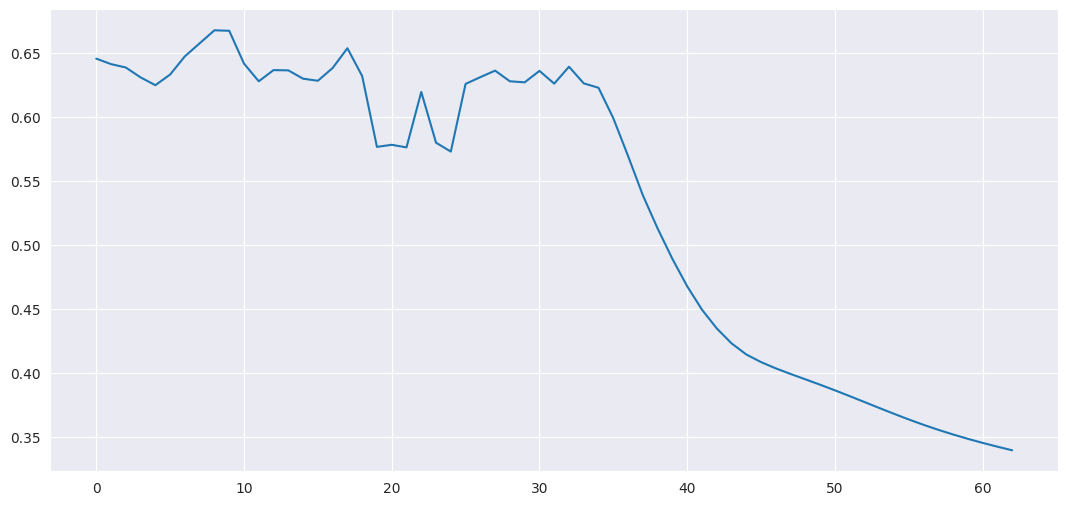

In [ ]:
plt.figure(figsize=(13,6))

data_new=data_high.tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])
plt.show()

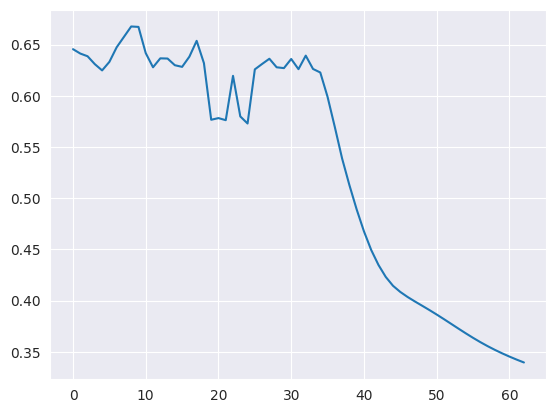

In [ ]:
data_new = data_high.tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])